# Create UMAP of single cell features

In [1]:
from livecell_tracker.sample_data import tutorial_three_image

dic_dataset, mask_dataset = tutorial_three_image(dic_dataset_path="../datasets/test_data_STAV-A549/DIC_data", mask_dataset_path="../datasets/test_data_STAV-A549/mask_data")

3 png img file paths loaded: 
3 tif img file paths loaded: 


In [2]:
from livecell_tracker.core.io_sc import prep_scs_from_mask_dataset
scs = prep_scs_from_mask_dataset(mask_dataset, dic_dataset)

100%|██████████| 3/3 [00:07<00:00,  2.43s/it]


In [3]:
from livecell_tracker.trajectory.feature_extractors import compute_haralick_features, compute_skimage_regionprops
from livecell_tracker.preprocess.utils import normalize_img_to_uint8
for sc in scs:
    features = compute_skimage_regionprops(sc, preprocess_img_func=normalize_img_to_uint8, sc_level_normalize=True)

In [4]:
sc.get_feature_pd_series()

skimage_area                 22262.000000
skimage_area_bbox            39672.000000
skimage_area_convex          23414.000000
skimage_area_filled          22262.000000
skimage_axis_major_length      263.397536
                                 ...     
skimage_orientation             -1.053940
skimage_perimeter              660.825469
skimage_perimeter_crofton      629.183347
skimage_solidity                 0.950799
t                                2.000000
Length: 144, dtype: float64

In [5]:
def create_sc_table(scs, normalize_features=True):
    import pandas as pd
    import numpy as np
    df = pd.DataFrame([sc.get_feature_pd_series() for sc in scs])
    if normalize_features:
        for col in df.columns:
            df[col] = (df[col] - df[col].mean())
            col_std = df[col].std()
            if col_std != 0 and not np.isnan(col_std):
                df[col] /= col_std
    # remove column t from df
    df.drop("t", axis=1, inplace=True)
    # df["sc_id"] = [sc.id for sc in scs]
    # df["t"] = [sc.timeframe for sc in scs]
    # df.set_index("sc_id", inplace=True)
    return df

sc_feature_table = create_sc_table(scs)
sc_feature_table[:2]

,skimage_area,skimage_area_bbox,skimage_area_convex,skimage_area_filled,skimage_axis_major_length,skimage_axis_minor_length,skimage_centroid-0,skimage_centroid-1,skimage_centroid_local-0,skimage_centroid_local-1,...,skimage_moments_weighted_normalized-2-2,skimage_moments_weighted_normalized-2-3,skimage_moments_weighted_normalized-3-0,skimage_moments_weighted_normalized-3-1,skimage_moments_weighted_normalized-3-2,skimage_moments_weighted_normalized-3-3,skimage_orientation,skimage_perimeter,skimage_perimeter_crofton,skimage_solidity
0,-0.729877,-0.697465,-0.785715,-0.729877,-1.025767,-0.300223,-0.557043,-0.863007,-0.557043,-0.863007,...,-1.144537,0.705302,0.791071,0.81463,-0.703368,1.11867,-0.394298,-0.881596,-0.912129,1.276949
1,-0.729877,-0.697465,-0.785715,-0.729877,-1.025767,-0.300223,-0.557043,-0.863007,-0.557043,-0.863007,...,-1.144537,0.705302,0.791071,0.81463,-0.703368,1.11867,-0.394298,-0.881596,-0.912129,1.276949


## Normalize features

## Perform UMAP on features

In [6]:
import umap
reducer = umap.UMAP()

In [7]:
# check if any columns are all NaN
sc_feature_table = sc_feature_table.dropna(axis=1, how="all")

In [8]:
embedding = reducer.fit_transform(sc_feature_table)

In [9]:
embedding.shape

(42, 2)

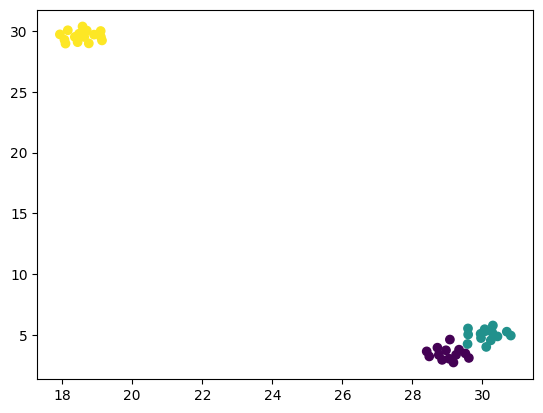

In [10]:
import matplotlib.pyplot as plt
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sc.timeframe for sc in scs],
)

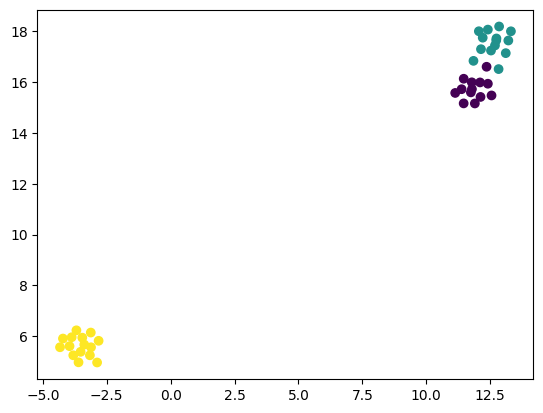

In [11]:
unnormalized_img_features = create_sc_table(scs, normalize_features=False)
# drop na
unnormalized_img_features = unnormalized_img_features.dropna(axis=1, how="all")
reducer = umap.UMAP()
unnormalized_embedding = reducer.fit_transform(unnormalized_img_features)
plt.scatter(
    unnormalized_embedding[:, 0],
    unnormalized_embedding[:, 1],
    c=[sc.timeframe for sc in scs],
)


In [ ]:
list(unnormalized_img_features.keys())